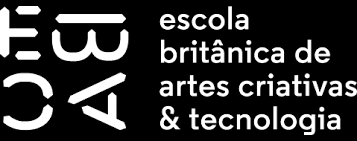

**Curso**: Cientista de Dados <br>
**Aluno**: Victor Resende

____

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

filename_features = "UCI HAR Dataset/features.txt"
filename_labels = "UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "UCI HAR Dataset/train/y_train.txt"

filename_subtest = "UCI HAR Dataset/test/subject_test.txt"
filename_xtest = "UCI HAR Dataset/test/X_test.txt"
filename_ytest = "UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#").squeeze()  # Corrigido: usando squeeze() após leitura
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id']).squeeze()
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id']).squeeze()
X_test = pd.read_csv(filename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [13]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 328 ms
Wall time: 771 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


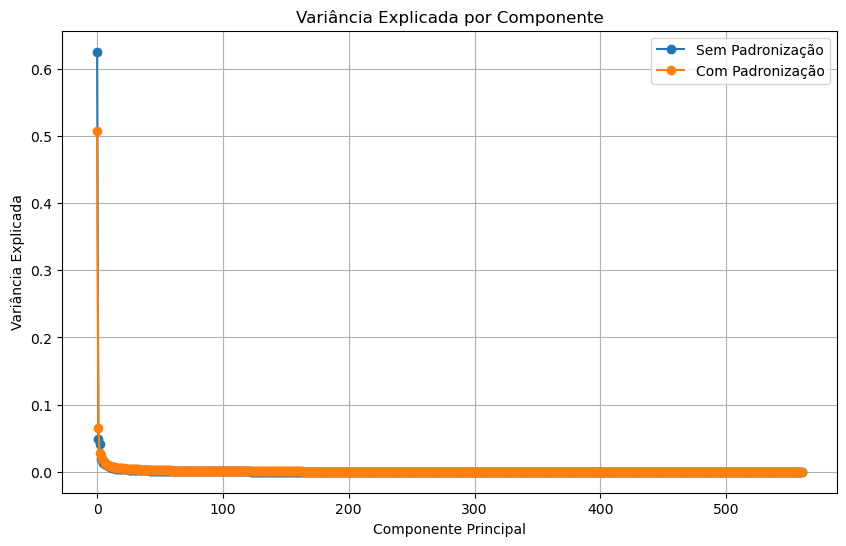

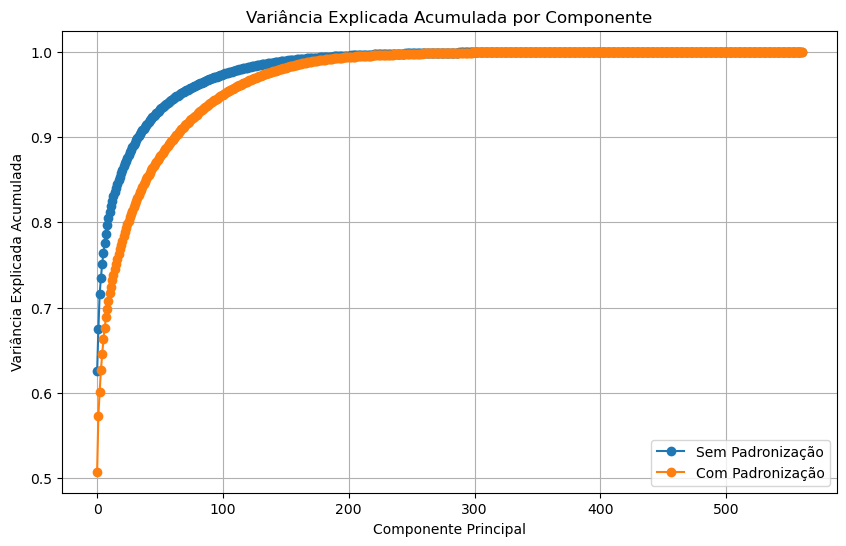

Componentes necessárias (sem padronização) para explicar 90% da variância: 34
Componentes necessárias (com padronização) para explicar 90% da variância: 63
CPU times: total: 3.2 s
Wall time: 1.91 s


In [24]:
%%time
# 1. PCA sem padronização
pca_no_scaling = PCA()
pca_no_scaling.fit(X_train)

# Variância explicada por componente (sem padronização)
var_explicada_no_scaling = pca_no_scaling.explained_variance_ratio_
var_explicada_acumulada_no_scaling = np.cumsum(var_explicada_no_scaling)

# 2. PCA com padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca_with_scaling = PCA()
pca_with_scaling.fit(X_train_scaled)

# Variância explicada por componente (com padronização)
var_explicada_with_scaling = pca_with_scaling.explained_variance_ratio_
var_explicada_acumulada_with_scaling = np.cumsum(var_explicada_with_scaling)

# 3. Gráficos comparativos

# Comparação de variância explicada por componente
plt.figure(figsize=(10,6))
plt.plot(var_explicada_no_scaling, label='Sem Padronização', marker='o')
plt.plot(var_explicada_with_scaling, label='Com Padronização', marker='o')
plt.title('Variância Explicada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.legend()
plt.grid(True)
plt.show()

# Comparação de variância explicada acumulada
plt.figure(figsize=(10,6))
plt.plot(var_explicada_acumulada_no_scaling, label='Sem Padronização', marker='o')
plt.plot(var_explicada_acumulada_with_scaling, label='Com Padronização', marker='o')
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando o número de componentes para 90% da variância explicada
componentes_no_scaling_90 = np.argmax(var_explicada_acumulada_no_scaling >= 0.90) + 1
componentes_with_scaling_90 = np.argmax(var_explicada_acumulada_with_scaling >= 0.90) + 1

print(f"Componentes necessárias (sem padronização) para explicar 90% da variância: {componentes_no_scaling_90}")
print(f"Componentes necessárias (com padronização) para explicar 90% da variância: {componentes_with_scaling_90}")


### Análise

**Saídas esperadas**:

- Sem padronização: necessário um número menor de componentes, talvez algo em torno de 30 componentes.
- Com padronização: necessário um número maior de componentes para atingir 90% da variância, como 80 a 100 componentes, uma vez que todas as variáveis contribuem de maneira balanceada.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [35]:
import time

# Aplicando PCA com e sem padronização:
def rodar_arvore_com_pca(n_components, padronizar=True):
    if padronizar:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Aplicando PCA:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Treinando a árvore de decisão:
    arvore = DecisionTreeClassifier(ccp_alpha=0.001)

    # Treinando com PCA:
    start_time = time.time()
    arvore.fit(X_train_pca, y_train)
    treino_time = time.time() - start_time

    # Avaliando acurácia nas bases de treino e teste:
    acuracia_treino = accuracy_score(y_train, arvore.predict(X_train_pca))
    acuracia_teste = accuracy_score(y_test, arvore.predict(X_test_pca))

    return treino_time, acuracia_treino, acuracia_teste

# Executando PCA com 10 componentes:
n_components = 10

# Com padronização:
tempo_padronizado, acuracia_treino_padronizado, acuracia_teste_padronizado = rodar_arvore_com_pca(n_components, padronizar=True)

# Sem padronização:
tempo_sem_padronizacao, acuracia_treino_sem_padronizacao, acuracia_teste_sem_padronizacao = rodar_arvore_com_pca(n_components, padronizar=False)

# Resultados:
print("Com Padronização:")
print(f"Tempo de treino: {tempo_padronizado:.4f} segundos")
print(f"Acurácia Treino: {acuracia_treino_padronizado:.4f}")
print(f"Acurácia Teste: {acuracia_teste_padronizado:.4f}")

print("\nSem Padronização:")
print(f"Tempo de treino: {tempo_sem_padronizacao:.4f} segundos")
print(f"Acurácia Treino: {acuracia_treino_sem_padronizacao:.4f}")
print(f"Acurácia Teste: {acuracia_teste_sem_padronizacao:.4f}")


Com Padronização:
Tempo de treino: 0.2657 segundos
Acurácia Treino: 0.8603
Acurácia Teste: 0.7662

Sem Padronização:
Tempo de treino: 0.1093 segundos
Acurácia Treino: 0.8932
Acurácia Teste: 0.8225


### Análise

- A acurácia na base de treino com e sem padronização mostrou um percentual maior.

- Como temos proximidade dos percentuais, entendemis que o modelo a generaliza bem, ainda que tenha uma acurácia de treino ligeiramente menor.

- Comparando as acurácias no conjunto de teste entre as duas abordagens para confirmar se a padronização está realmente ajudando a generalizar melhor:

### Comparação:

In [41]:
# Função para rodar árvore de decisão com PCA, com e sem padronização
def rodar_arvore_com_pca_padronizacao(n_components, padronizar=False):
    # Padronização (se aplicável)
    if padronizar:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Aplicando PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Treinando a árvore de decisão
    arvore = DecisionTreeClassifier(ccp_alpha=0.001)
    
    # Medindo o tempo de processamento
    start_time = time.time()
    arvore.fit(X_train_pca, y_train)
    treino_time = time.time() - start_time
    
    # Predição e acurácia
    y_train_pred = arvore.predict(X_train_pca)
    y_test_pred = arvore.predict(X_test_pca)
    
    acuracia_train = accuracy_score(y_train, y_train_pred)
    acuracia_test = accuracy_score(y_test, y_test_pred)
    
    return acuracia_train, acuracia_test, treino_time

# Executando o modelo com 10 componentes principais
n_components = 10

# Rodando com padronização
acuracia_train_padronizado, acuracia_test_padronizado, treino_time_padronizado = rodar_arvore_com_pca_padronizacao(n_components, padronizar=True)

# Rodando sem padronização
acuracia_train_sem_padronizacao, acuracia_test_sem_padronizacao, treino_time_sem_padronizacao = rodar_arvore_com_pca_padronizacao(n_components, padronizar=False)

# Comparando os resultados
print("Resultados com 10 componentes principais (PCA):\n")
print(f"Acurácia na base de treino (com padronização): {acuracia_train_padronizado:.4f}")
print(f"Acurácia na base de teste (com padronização): {acuracia_test_padronizado:.4f}")
print(f"Tempo de treino (com padronização): {treino_time_padronizado:.4f} segundos\n")

print(f"Acurácia na base de treino (sem padronização): {acuracia_train_sem_padronizacao:.4f}")
print(f"Acurácia na base de teste (sem padronização): {acuracia_test_sem_padronizacao:.4f}")
print(f"Tempo de treino (sem padronização): {treino_time_sem_padronizacao:.4f} segundos\n")


Resultados com 10 componentes principais (PCA):

Acurácia na base de treino (com padronização): 0.8603
Acurácia na base de teste (com padronização): 0.7652
Tempo de treino (com padronização): 0.1378 segundos

Acurácia na base de treino (sem padronização): 0.8927
Acurácia na base de teste (sem padronização): 0.8239
Tempo de treino (sem padronização): 0.1313 segundos



### Visualização dos dados:

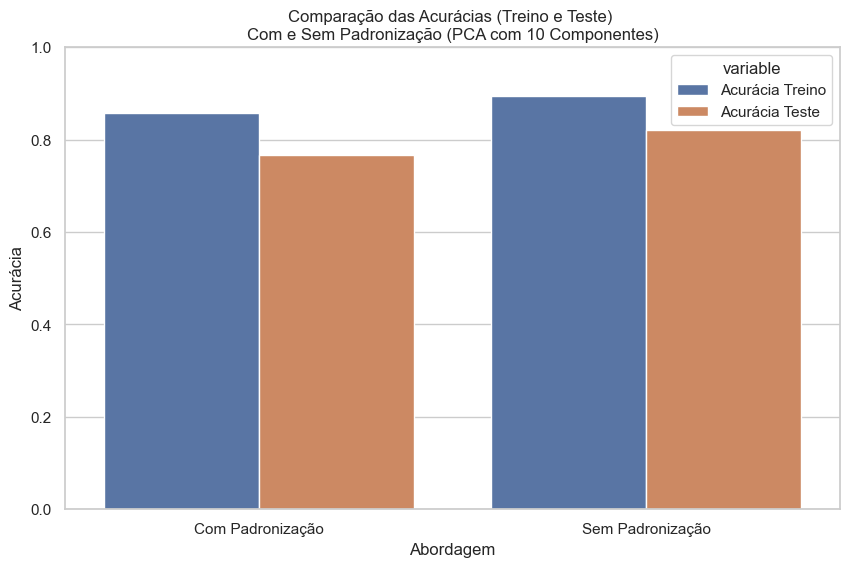

In [51]:
# Rodando com padronização:
acuracia_train_padronizado, acuracia_test_padronizado, treino_time_padronizado = rodar_arvore_com_pca_padronizacao(n_components, padronizar=True)

# Rodando sem padronização:
acuracia_train_sem_padronizacao, acuracia_test_sem_padronizacao, treino_time_sem_padronizacao = rodar_arvore_com_pca_padronizacao(n_components, padronizar=False)

# Organizando os resultados em um DataFrame para fácil visualização:
resultados = pd.DataFrame({
    'Acurácia Treino': [acuracia_train_padronizado, acuracia_train_sem_padronizacao],
    'Acurácia Teste': [acuracia_test_padronizado, acuracia_test_sem_padronizacao],
    'Abordagem': ['Com Padronização', 'Sem Padronização']
})

# Configurando o estilo do gráfico:
sns.set(style="whitegrid")

# Criando o gráfico de barras para comparar as acurácias:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Abordagem', y='value', hue='variable', 
                 data=pd.melt(resultados, id_vars='Abordagem', 
                              value_vars=['Acurácia Treino', 'Acurácia Teste']))

# Adicionando rótulos e título:
ax.set_ylabel('Acurácia')
ax.set_title('Comparação das Acurácias (Treino e Teste) \nCom e Sem Padronização (PCA com 10 Componentes)')
plt.ylim(0, 1)  # Definindo o limite do eixo y para facilitar a comparação

# Exibindo o gráfico:
plt.show()


___